<a href="https://colab.research.google.com/github/nrdnandan/Personal_Projects/blob/main/beer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install umap-learn

In [ ]:
!pip install scikit-learn numba faiss gpumap

  Using cached faiss-1.5.3-cp36-cp36m-manylinux1_x86_64.whl (4.7 MB)
  Using cached gpumap-0.1.1-py3-none-any.whl (52 kB)


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
#from umap import UMAP
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS/train.csv')

In [ ]:
df.head(30)

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.00,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.00,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.70,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.40,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.40,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000
5,14095,10.00,21436,14,YouEnjoyMyStout,Russian Imperial Stout,4.0,4.0,4.0,4.0,4.5,served in a snifter; on-tap at CBC.\t\tcolor i...,"{'min': 16, 'hour': 1, 'mday': 20, 'sec': 9, '...",1324343769,NaN,NaN,NaN,NaN,perrymarcus
6,13759,12.60,10001,14,Benevolence,American Wild Ale,4.0,4.5,4.0,4.0,4.0,my 100th review on-tap! mini snifter\t\t A nut...,"{'min': 1, 'hour': 18, 'mday': 8, 'sec': 12, '...",1244484072,NaN,NaN,NaN,NaN,GratefulBeerGuy
7,3914,8.40,52211,14879,Frog's Hollow Double Pumpkin Ale,Pumpkin Ale,4.0,4.0,4.0,4.0,4.0,One of the better pumpkin ales I've tried so f...,"{'min': 32, 'hour': 20, 'mday': 9, 'sec': 40, ...",1286656360,NaN,NaN,NaN,NaN,Daniellobo
8,47953,9.00,34361,394,Stoudt's Barrel Aged Old Abominable,English Barleywine,4.5,4.0,4.5,4.5,4.5,A snifter filled (several times over) from a 7...,"{'min': 26, 'hour': 3, 'mday': 16, 'sec': 13, ...",1279250773,NaN,NaN,NaN,Male,msubulldog25
9,7047,6.20,32676,1386,One Hop Wonder IPA,American IPA,2.0,2.0,2.0,2.5,2.0,"Brewed with five hop additions, this alleged I...","{'min': 26, 'hour': 5, 'mday': 16, 'sec': 41, ...",1160976401,NaN,NaN,NaN,NaN,RedDiamond


In [ ]:
df.drop('index',axis=1).describe() #Statistical evaluation of all numerical variables, the max, the min, standard deviation, mean and IQR

,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix,user/ageInSeconds,user/birthdayUnix
count,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,3.750000e+04,7.856000e+03,7.856000e+03
mean,7.403725,21861.152027,3036.595120,3.900053,3.873240,3.88944,3.854867,3.922440,1.232794e+09,1.176705e+09,2.416303e+08
std,2.318145,18923.130832,5123.084675,0.588778,0.680865,0.70045,0.668068,0.716504,7.190955e+07,3.375514e+08,3.375514e+08
min,0.100000,175.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,9.262944e+08,7.034366e+08,-2.208960e+09
25%,5.400000,5441.000000,395.000000,3.500000,3.500000,3.50000,3.500000,3.500000,1.189194e+09,9.794810e+08,1.433628e+08
50%,6.900000,17538.000000,1199.000000,4.000000,4.000000,4.00000,4.000000,4.000000,1.248150e+09,1.100009e+09,3.183264e+08
75%,9.400000,34146.000000,1315.000000,4.500000,4.500000,4.50000,4.500000,4.500000,1.291330e+09,1.274973e+09,4.388544e+08
max,57.700000,77207.000000,27797.000000,5.000000,5.000000,5.00000,5.000000,5.000000,1.326267e+09,3.627295e+09,7.148988e+08


In [ ]:
df['review/text'].isna().sum()

10

In [ ]:
df['beer/name'].isna().sum(),df['beer/style'].isna().sum()

(0, 0)

In [ ]:
df.dropna(subset =['review/text'],inplace=True)

In [ ]:
df[['beer/ABV','review/appearance','review/aroma','review/palate','review/taste','review/overall']].corr() #Which numerical variable influence the dependent variable the most

,beer/ABV,review/appearance,review/aroma,review/palate,review/taste,review/overall
beer/ABV,1.000000,0.288139,0.386160,0.350536,0.353878,0.196780
review/appearance,0.288139,1.000000,0.537925,0.555750,0.531560,0.498628
review/aroma,0.386160,0.537925,1.000000,0.608895,0.711766,0.616031
review/palate,0.350536,0.555750,0.608895,1.000000,0.732036,0.697172
review/taste,0.353878,0.531560,0.711766,0.732036,1.000000,0.785174
review/overall,0.196780,0.498628,0.616031,0.697172,0.785174,1.000000


In [ ]:
X_df = df.drop(['index','beer/beerId','beer/brewerId','review/overall','review/timeStruct','review/timeUnix','user/birthdayRaw','user/birthdayUnix','user/profileName','user/ageInSeconds','user/gender'],axis=1)

In [ ]:
X_df.head()

,beer/ABV,beer/name,beer/style,review/appearance,review/aroma,review/palate,review/taste,review/text
0,5.0,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...
1,11.0,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...
2,4.7,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,First enjoyed at the brewpub about 2 years ago...
3,4.4,Pilsner Urquell,Czech Pilsener,3.0,3.0,3.0,3.0,First thing I noticed after pouring from green...
4,4.4,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...


In [ ]:
X_df.corr() #Which are the highly correlated independent numerical variables

,beer/ABV,review/appearance,review/aroma,review/palate,review/taste
beer/ABV,1.000000,0.288139,0.386160,0.350536,0.353878
review/appearance,0.288139,1.000000,0.537925,0.555750,0.531560
review/aroma,0.386160,0.537925,1.000000,0.608895,0.711766
review/palate,0.350536,0.555750,0.608895,1.000000,0.732036
review/taste,0.353878,0.531560,0.711766,0.732036,1.000000


In [ ]:
df['beer/name'].value_counts()

Founders Breakfast Stout                   1883
Founders KBS (Kentucky Breakfast Stout)    1439
Founders Centennial IPA                    1063
Founders Red's Rye PA                      1051
Founders Dirty Bastard                      983
                                           ... 
D'n Osse Frater Bokbier                       1
Maibock                                       1
Krystal Weis                                  1
Log Towne Lager                               1
Zahre Affumicata                              1
Name: beer/name, Length: 1688, dtype: int64

In [ ]:
df['beer/style'].value_counts()

American Double / Imperial Stout    4493
American IPA                        3048
American Double / Imperial IPA      2871
Scotch Ale / Wee Heavy              2133
Russian Imperial Stout              2030
                                    ... 
Lambic - Fruit                         6
Berliner Weissbier                     6
Eisbock                                5
BiÃ¨re de Garde                        4
Flanders Red Ale                       2
Name: beer/style, Length: 95, dtype: int64

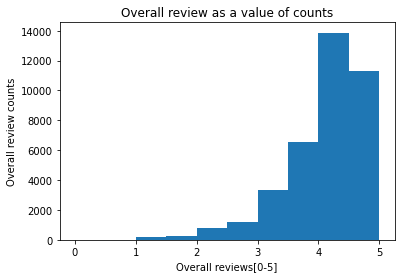

In [ ]:
plt.hist(df['review/overall']);
plt.title('Overall review as a value of counts')
plt.xlabel('Overall reviews[0-5]')
plt.ylabel('Overall review counts');

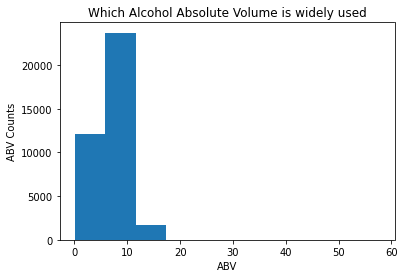

In [ ]:
plt.hist(df['beer/ABV']);
plt.title('Which Alcohol Absolute Volume is widely used')
plt.xlabel('ABV')
plt.ylabel('ABV Counts');

In [ ]:
df['beer/ABV'].value_counts()

6.50     2095
5.00     2015
8.30     1890
6.60     1848
9.40     1846
         ... 
3.75        1
57.70       1
3.20        1
14.50       1
10.30       1
Name: beer/ABV, Length: 126, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


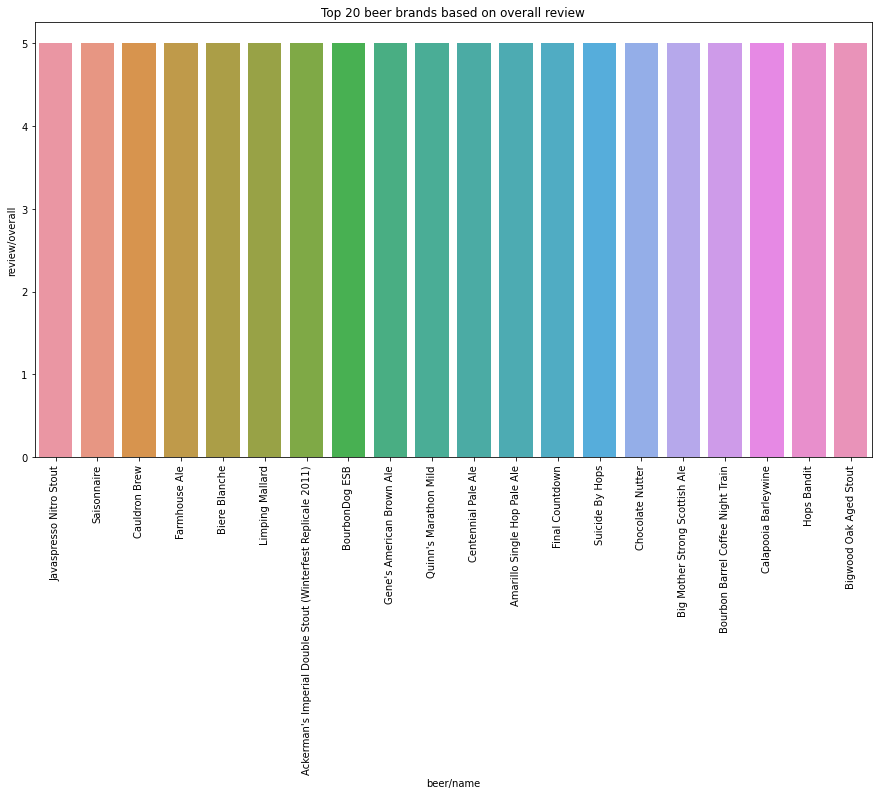

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(df.groupby('beer/name')['review/overall'].mean().reset_index().sort_values('review/overall',ascending=False)['beer/name'][:20],df.groupby('beer/name')['review/overall'].mean().reset_index().sort_values('review/overall',ascending=False)['review/overall'][:20]);
plt.xticks(rotation='vertical');
plt.title('Top 20 beer brands based on overall review');

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


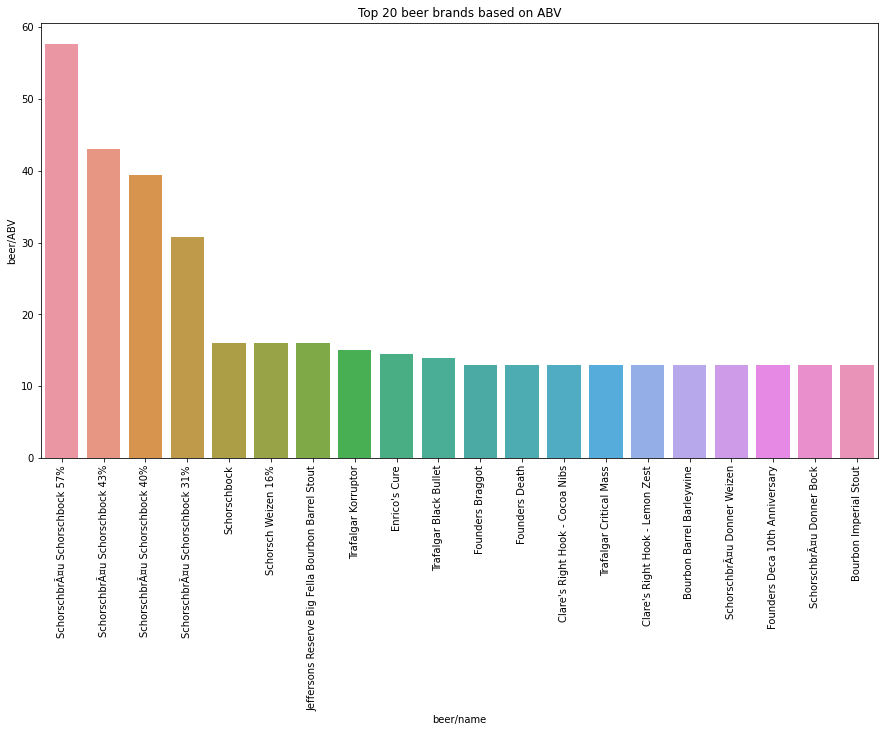

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(df.groupby('beer/name')['beer/ABV'].mean().reset_index().sort_values('beer/ABV',ascending=False)['beer/name'][:20],df.groupby('beer/name')['beer/ABV'].mean().reset_index().sort_values('beer/ABV',ascending=False)['beer/ABV'][:20]);
plt.xticks(rotation='vertical');
plt.title('Top 20 beer brands based on ABV');

In [ ]:
reviews = df['review/text'].str.cat(sep=' ').lower()

In [ ]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [ ]:
tokens = tokenizer.tokenize(reviews)

In [ ]:
reviews = ' '.join(tokens)

In [ ]:
tokens = word_tokenize(reviews)

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
vocabulary = set(tokens)

tokens = [w for w in tokens if not w in stop_words]

In [ ]:
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50] #Frequemcy distribution of top 50 words

['beer',
 'head',
 'taste',
 'nice',
 'like',
 'good',
 'malt',
 'one',
 'hops',
 'sweet',
 'light',
 'dark',
 'flavor',
 'bit',
 'chocolate',
 'carbonation',
 'well',
 'aroma',
 'coffee',
 'little',
 'glass',
 'smell',
 'finish',
 'mouthfeel',
 'bottle',
 'pours',
 'color',
 'hop',
 'alcohol',
 'lacing',
 'brown',
 'medium',
 'body',
 'caramel',
 'really',
 'much',
 'poured',
 'bitter',
 'bitterness',
 'smooth',
 'white',
 'malts',
 'would',
 'great',
 'nose',
 'black',
 'flavors',
 'notes',
 'roasted',
 'thick']

In [ ]:
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)

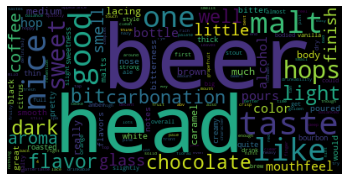

In [ ]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.title('Word Cloud for reviews')

In [ ]:
df_new = pd.get_dummies(df,columns=['beer/name','beer/style']) #OHE for categorical variable beer/name and beer/style

In [ ]:
df_new['review/text'] = df_new['review/text'].apply(lambda x : x.lower())

In [ ]:
df_new['review/text'] = df_new['review/text'].apply(lambda x : ' '.join(tokenizer.tokenize(x)))

In [ ]:
df_new['review/text'] = df_new['review/text'].apply(lambda x : ' '.join([w for w in word_tokenize(x) if not w in stop_words]))

In [ ]:
X = df_new.drop(axis=1,labels = ['index','beer/beerId','beer/brewerId','review/overall','review/timeStruct','review/timeUnix','user/birthdayRaw','user/birthdayUnix','user/profileName','user/ageInSeconds','user/gender'])
Y = df_new['review/overall']

In [ ]:
X.shape,Y.shape

((37490, 1789), (37490,))

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42) #Splitting train and test data

In [ ]:
X_train.shape,X_test.shape

((29992, 1789), (7498, 1789))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()
scale.fit(X_train[['beer/ABV','review/appearance','review/aroma','review/palate','review/taste']]); #Stadardizing data before dimensionality reduction

In [ ]:
X_train_scale = pd.DataFrame(scale.transform(X_train[['beer/ABV','review/appearance','review/aroma','review/palate','review/taste']]),columns=['beer/ABV','review/appearance','review/aroma','review/palate','review/taste'])

In [ ]:
X_train.drop(['beer/ABV','review/appearance','review/aroma','review/palate','review/taste'],1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
X_train = pd.merge(X_train,X_train_scale,on=X_train_scale.index)

In [ ]:
X_train.drop('key_0',1,inplace=True)

In [ ]:
X_test_scale = pd.DataFrame(scale.transform(X_test[['beer/ABV','review/appearance','review/aroma','review/palate','review/taste']]),columns=['beer/ABV','review/appearance','review/aroma','review/palate','review/taste'])

In [ ]:
X_test.drop(['beer/ABV','review/appearance','review/aroma','review/palate','review/taste'],1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
X_test = pd.merge(X_test,X_test_scale,on=X_test_scale.index)
X_test.drop('key_0',1,inplace=True)

In [ ]:
vect = TfidfVectorizer() #TF-IDF Vectorizer

In [ ]:
train_vectors = vect.fit_transform(X_train['review/text'].values)
test_vectors = vect.transform(X_test['review/text'].values)
print(train_vectors.shape, test_vectors.shape)

(29992, 36356) (7498, 36356)


In [ ]:
train_vectors

<29992x36356 sparse matrix of type '<class 'numpy.float64'>'
	with 1841277 stored elements in Compressed Sparse Row format>

In [ ]:
dim_red = TruncatedSVD(n_components=200,random_state=42) #Truncated Singular Value Decomposition for reduction of dimensions

In [ ]:
train_vectors = dim_red.fit_transform(train_vectors)
test_vectors = dim_red.transform(test_vectors)

In [ ]:
train_vectors = pd.DataFrame(train_vectors)
test_vectors = pd.DataFrame(test_vectors)

In [ ]:
X_train.drop('review/text',1,inplace=True)
X_test.drop('review/text',1,inplace=True)

In [ ]:
X_train_join = pd.merge(X_train,train_vectors,on=train_vectors.index)
X_test_join = pd.merge(X_test,test_vectors,on=test_vectors.index)

In [ ]:
X_train_join.shape,X_test_join.shape

((29992, 1989), (7498, 1989))

In [ ]:
X_train_join.drop('key_0',1,inplace=True)
X_test_join.drop('key_0',1,inplace=True)

In [ ]:
reg_rf = RandomForestRegressor(n_jobs=-1,random_state=42,n_estimators=200) #Random Forest Regressor

In [ ]:
reg_rf.fit(X_train_join,Y_train);

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
pred_rf = reg_rf.predict(X_test_join) #Prediction of Random Forest regression

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

In [ ]:
mean_squared_error(Y_test,pred_rf),mean_absolute_error(Y_test,pred_rf),r2_score(Y_test,pred_rf) #Evaluation fo RF regreesion

(0.15812216090957587, 0.30331955188050147, 0.6864154821267566)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
reg_knn = KNeighborsRegressor(n_jobs=-1)

In [ ]:
reg_knn.fit(X_train_join,Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
pred_knn = reg_knn.predict(X_test_join)

In [ ]:
mean_squared_error(Y_test,pred_knn),mean_absolute_error(Y_test,pred_knn),r2_score(Y_test,pred_knn)

(0.19165910909575887, 0.3336356361696452, 0.6199057173511651)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg_lin = LinearRegression(n_jobs=-1)

In [ ]:
reg_lin.fit(X_train_join,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [ ]:
pred_lin = reg_lin.predict(X_test_join)

In [ ]:
mean_squared_error(Y_test,pred_lin),mean_absolute_error(Y_test,pred_lin),r2_score(Y_test,pred_lin)

(4.4770442610241766e+17, 42135878.73113311, -8.878779280617682e+17)

In [ ]:
from tensorflow import keras
from keras import layers
import tensorflow as tf
from keras.layers.experimental.preprocessing import Normalization

In [ ]:
normalize = Normalization()

In [ ]:
model = keras.Sequential([ normalize,
                          layers.Dense(1024, activation = 'relu',dtype='float64'),
                          layers.Dense(1024, activation = 'relu',dtype='float64'),
                          layers.Dense(1,dtype='float64')]) #DNN 2 layer Model for regression

In [ ]:
model.compile(loss='mean_absolute_error',
                optimizer='Adam',metrics = 'mse')

In [ ]:
model.fit(X_train_join,Y_train,validation_split=0.1,epochs=100,batch_size=1, callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_mse', patience=5, restore_best_weights=True))

Epoch 1/100
26992/26992 [==============================] - 76s 3ms/step - loss: 0.3939 - mse: 0.2789 - val_loss: 0.3085 - val_mse: 0.1648
Epoch 2/100
26992/26992 [==============================] - 74s 3ms/step - loss: 0.3190 - mse: 0.1750 - val_loss: 0.3118 - val_mse: 0.1653
Epoch 3/100
26992/26992 [==============================] - 73s 3ms/step - loss: 0.3073 - mse: 0.1647 - val_loss: 0.3139 - val_mse: 0.1671
Epoch 4/100
26992/26992 [==============================] - 74s 3ms/step - loss: 0.2977 - mse: 0.1552 - val_loss: 0.3047 - val_mse: 0.1599
Epoch 5/100
26992/26992 [==============================] - 73s 3ms/step - loss: 0.2906 - mse: 0.1499 - val_loss: 0.3100 - val_mse: 0.1630
Epoch 6/100
26992/26992 [==============================] - 73s 3ms/step - loss: 0.2792 - mse: 0.1409 - val_loss: 0.3183 - val_mse: 0.1725
Epoch 7/100
26992/26992 [==============================] - 74s 3ms/step - loss: 0.2691 - mse: 0.1325 - val_loss: 0.3167 - val_mse: 0.1703
Epoch 8/100
26992/26992 [=========

In [ ]:
pred_dnn = model.predict(X_test_join)

In [ ]:
mean_squared_error(Y_test,pred_dnn),mean_absolute_error(Y_test,pred_dnn),r2_score(Y_test,pred_dnn)

(0.15801535676701156, 0.3014721807868567, 0.6866272938384119)

In [ ]:
#DNN regressor > RF regressor > KNN regressor > Linear Regressor (owrst)